## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv",
    header=0)

data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [263]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [264]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [265]:
data.isnull().values.any()

False

In [5]:
quantitative_f = ['duration', 'amount', 'age'] # Количественные

binary_f = ['telephone', 'foreign_worker','people_liable', 'credit_risk'] # Бинарные

ordinal_f = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'job']  # Порядковые

categorical_f = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 
'other_installment_plans', 'housing'] # Категориальные

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [267]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [268]:
print((data[data['age'] < 30]['housing'] == 'rent').mean())
(data[data['age'] > 40]['housing'] == 'rent').mean()

0.6666666666666666


0.6801470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [269]:
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6'))].shape[0]

1

### Задание 6 (1 балл)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

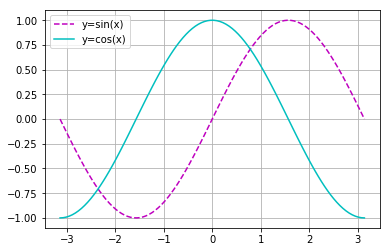

In [271]:
x = np.linspace(-np.pi, np.pi, num=100)
y_sin = np.sin(x)
y_cos = np.cos(x)
plt.plot(x, y_sin, color='m', linestyle = '--', label='y=sin(x)')
plt.plot(x, y_cos, color='c', label='y=cos(x)')
plt.legend()
plt.grid(True)

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

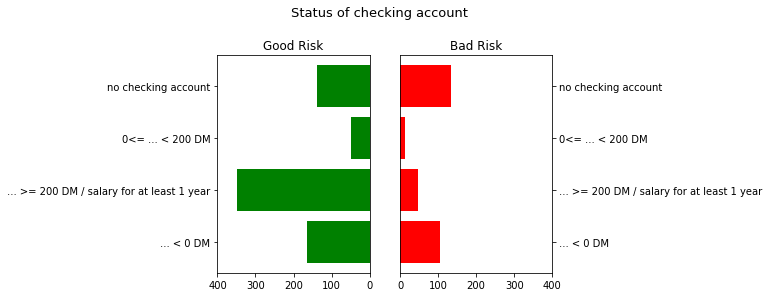

In [272]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Status of checking account', size=13, y=1.05)

statuses = data.groupby('status').groups.keys()
y_pos = np.arange(len(statuses))

nums_bad = data.groupby('status')['credit_risk'].value_counts()[1::2]
ax2.barh(y_pos, nums_bad, align='center', color='red')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(statuses)
ax2.set_title('Bad Risk')
ax2.yaxis.tick_right()
ax2.set(xlim=(0, 400))

nums_good = data.groupby('status')['credit_risk'].value_counts()[0::2]
ax1.barh(y_pos, nums_good, align='center', color='green')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(statuses)
ax1.set_title('Good Risk')
ax1.yaxis.tick_left()
ax1.invert_xaxis()
ax1.set(xlim=(400, 0))

plt.show()

Небольшой комментарий с выводами: в целом, чем больше сумма на существующем расчетном счете, тем более вероятно, что кредитный 
риск хороший. Наибольшее доверие у банка вызывают люди, на счету которых >= 200 DM/зарплата как минимум за 1 год, тогда как 
плохой кредитный риск чаще всего у людей без расчетного счета.

In [273]:
data.groupby('status')['credit_risk'].value_counts()

status                                      credit_risk
... < 0 DM                                  good           164
                                            bad            105
... >= 200 DM / salary for at least 1 year  good           348
                                            bad             46
0<= ... < 200 DM                            good            49
                                            bad             14
no checking account                         good           139
                                            bad            135
Name: credit_risk, dtype: int64

### Задание 8  (0.5 балла)

In [274]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [275]:
data.groupby(['savings'])['credit_risk'].value_counts()

savings                     credit_risk
... <  100 DM               good            69
                            bad             34
... >= 1000 DM              good           151
                            bad             32
100 <= ... <  500 DM        good            52
                            bad             11
500 <= ... < 1000 DM        good            42
                            bad              6
unknown/no savings account  good           386
                            bad            217
Name: credit_risk, dtype: int64

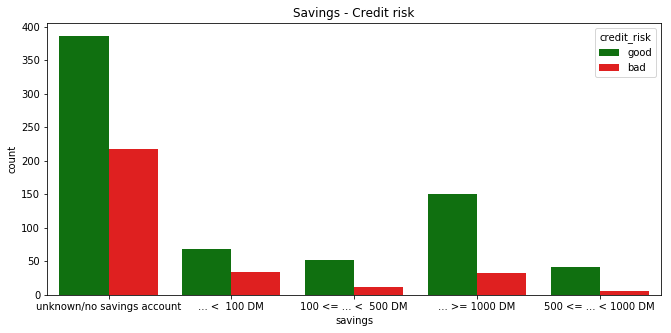

In [276]:
fig, ax = plt.subplots(figsize=(11,5))
sns.countplot(x='savings', hue='credit_risk', data=data, ax=ax, palette=['#008000','#FF0000'])
ax.set_title('Savings - Credit risk')
plt.show()

Этот способ и пишется легче, и визуально приятнее)) 

Небольшой комментарий с выводами: большинство кредитов взяты людьми, у которых отсутствуют сбережения или их размер неизвестен. Для размера сбер.счета ... < 100 DM число положительных кейсов примерно в два раза больше, чем отрицательных, но для больших размеров счета данная пропорция не сохраняется. Наибольшая разница между положительными и отрицательными кейсами наблюдается для сбережений размером 500 <= ... < 1000 DM (хороших кейсов в 7 раз больше).

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

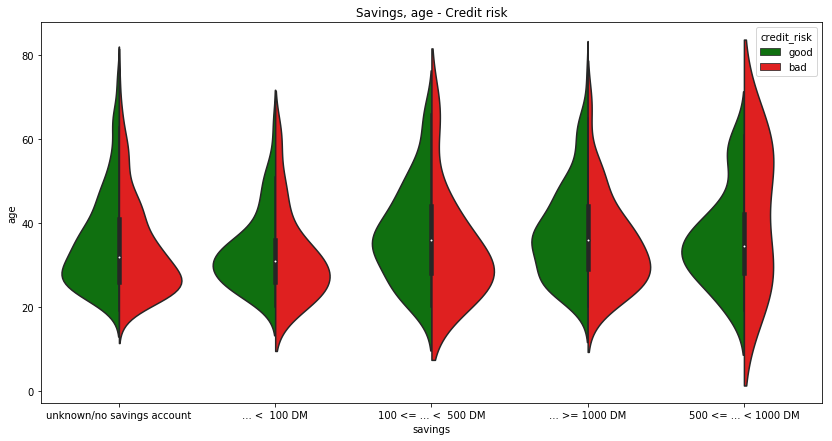

In [277]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('Savings, age - Credit risk')
ax = sns.violinplot(x="savings", y="age", data=data, hue='credit_risk', split=True, palette=['#008000','#FF0000'])

Очень небольшой комментарий с выводами: график выглядит стремно. Большинство кредитов приходится на людей 20-40 лет, наименьшее - на людей 60-80 лет, а также до 20 лет для всех размеров сберегательного счета.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

Text(0.5, 1.05, 'Credit risk - Age distribution')

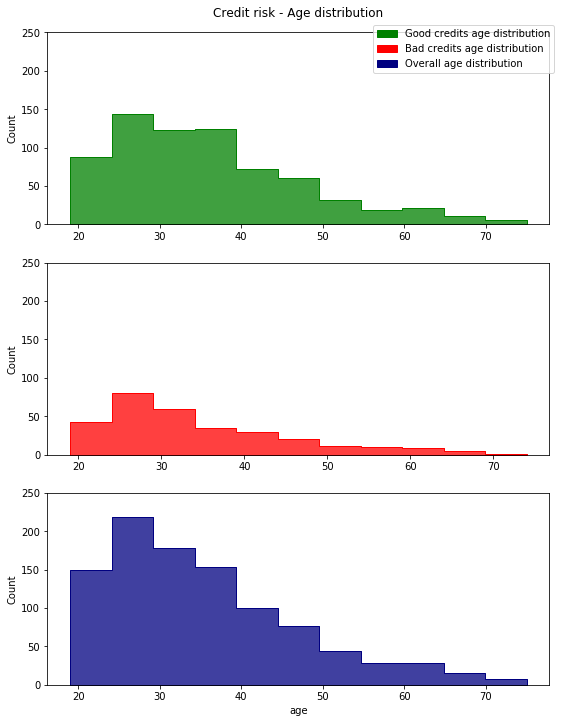

In [278]:
fig, axes = plt.subplots(3, figsize=(9, 12))

sns.histplot(ax=axes[0], data=data[data['credit_risk'] == 'good'], x='age', element='step', color='green', bins=11)
sns.histplot(ax=axes[1], data=data[data['credit_risk'] == 'bad'], x='age', element='step', color='red', bins=11)
sns.histplot(ax=axes[2], data=data, x='age', element='step', color='navy', bins=11)

for i in range(3):
    axes[i].set(ylim=(0, 250))
    if i != 2:
        axes[i].set(xlabel=None)
        
red_patch = mpatches.Patch(color='green', label='Good credits age distribution')
green_patch = mpatches.Patch(color='red', label='Bad credits age distribution')
blue_patch = mpatches.Patch(color='navy', label='Overall age distribution')
axes[0].legend(handles=[red_patch, green_patch, blue_patch], bbox_to_anchor= (1.02, 1.065))
axes[0].set_title('Credit risk - Age distribution', y=1.05)


Очень небольшой комментарий с выводами: чаще всего берут кредиты люди от 25 до 30 лет, после этого с ростом возраста число кредитов уменьшается, однако независимо от возраста число положительных кейсов остается больше, чем число отрицательных.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0.5, 1.0, 'Credit amount - Duration')

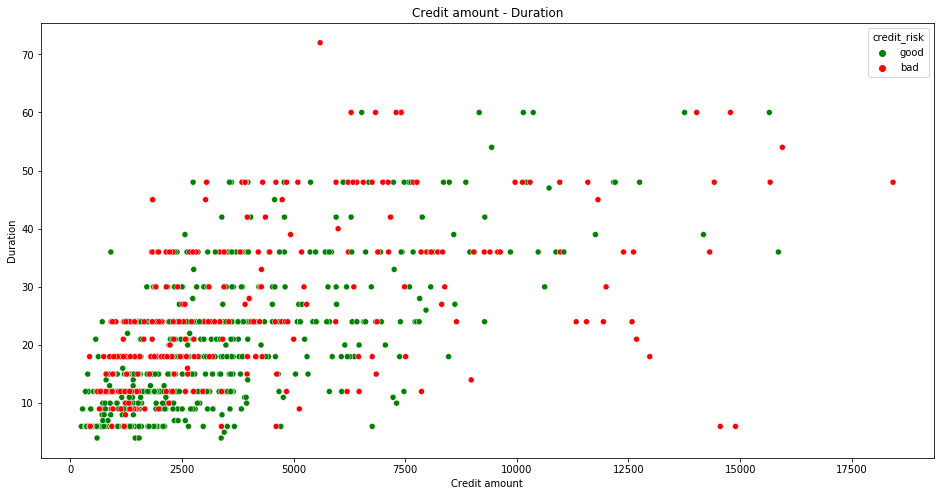

In [279]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.scatterplot(data=data, x="amount", y="duration", hue='credit_risk', palette=['#008000','#FF0000'])
ax.set(xlabel='Credit amount', ylabel='Duration')
ax.set_title('Credit amount - Duration')

Небольшой комментарий с выводами: в большинстве положительных кейсов продолжительность кредита в месяцах не превышает 20, а размер - 5000, что вполне объяснимо, так как краткосрочные небольшие кредиты легче всего выплатить. У людей с кредитом на 24 месяца чаще всего плохой кредитный риск, если их размер до 5000, но если размер от 5000 до 10000, то в большинстве случаев он хороший. Если кредит с большой продолжительностью (35+ месяцев) и большим размером (11000+), то риск в большинстве случает плохой.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

Text(0.5, 0.92, 'Credit amount - Duration - Age')

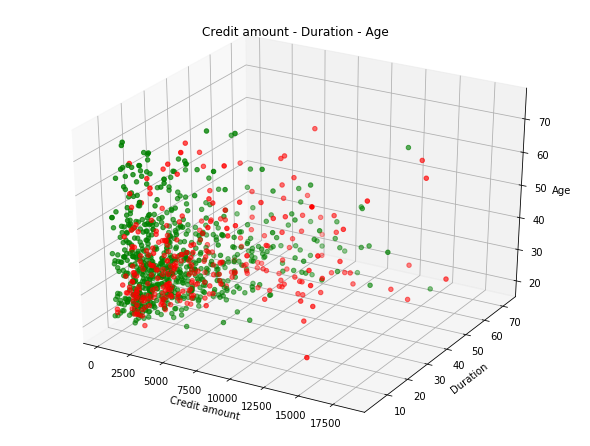

In [280]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

x = data['amount']
y = data['duration']
z = data['age']

ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

col = data['credit_risk'].apply(lambda x: '#008000' if x == 'good' else '#FF0000')

ax.scatter(x, y, z, c=col)
ax.set_title('Credit amount - Duration - Age')

Очень небольшой комментарий с выводами: тут не получается покрутить 3D-модель, что очень печально, но в целом заметно, что большинство положительных кейсов составляют люди до 40 лет с краткосрочными кредитами до 5000, после 40 лет положительные кейсы за редким исключением остаются также только при маленьком размере кредита.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
status_ord = ['no checking account', '... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year']
savings_ord = ['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM']
employment_duration_ord = ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs']
installment_rate_ord = ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35']
present_residence_ord = ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs']
number_credits_ord = ['1', '2-3', '4-5', '>= 6']
job_ord = ['unemployed/unskilled - non-resident','unskilled - resident','skilled employee/official', 'manager/self-empl./highly qualif. employee']

orders = [status_ord, savings_ord, employment_duration_ord, installment_rate_ord, present_residence_ord, number_credits_ord, job_ord]

for i in range(len(ordinal_f)):
    data[ordinal_f[i]] = data[ordinal_f[i]].apply(lambda x: orders[i].index(x))

In [8]:
enc = OrdinalEncoder()
data[binary_f] = enc.fit_transform(data[binary_f])

[array(['no', 'yes (under customer name)'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['0 to 2', '3 or more'], dtype=object),
 array(['bad', 'good'], dtype=object)]

In [10]:
data = pd.get_dummies(data, prefix=categorical_f, dummy_na=False, columns=categorical_f)

In [11]:
data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,...,property_building soc. savings agr./life insurance,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent
0,0,18,1049,0,1,0,3,21,0,2,...,0,1,0,0,0,1,0,1,0,0
1,0,9,2799,0,2,2,1,36,1,2,...,0,0,0,1,0,1,0,1,0,0
2,1,12,841,1,3,2,3,23,0,1,...,0,0,0,1,0,1,0,1,0,0
3,0,12,2122,0,2,1,1,39,1,1,...,0,0,0,1,0,1,0,1,0,0
4,0,12,2171,0,2,0,3,38,1,1,...,0,1,0,0,1,0,0,0,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [12]:
# вдохновилась семинаром

class Normalizer:
    def fit(self, X: np.array) -> None:
        self.mu = X.mean(axis=0)
        self.sigma = X.std(axis=0)
        
    def transform(self, X: np.array) -> np.array:
        return (X - self.mu[np.newaxis, :]) / self.sigma[np.newaxis, :]

In [15]:
# а покажите пример какой-нибудь функции, пожалуйста, а то не очень ясно, как ее придумывать

def predict(Xtest: np.array) -> np.array:
    return np.where(np.sum(Xtest, axis=1) < 14.8, 1.0, 0.0)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(90) # на всякий
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

normalizer = Normalizer()
normalizer.fit(X_train)
X_test = normalizer.transform(X_test)
accuracy_score(y_test, predict(X_test))

0.668